In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('Diabetes-Classification.csv')
df = df.dropna()

In [7]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [8]:
cat_cols=['Gender', 'Blood Pressure', 'Family History of Diabetes', 'Smoking', 'Diet', 'Exercise', 'Diagnosis']

In [9]:
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [10]:
df.head()

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,1,25.0,2,100,5.7,0,0,0,1,0
1,55,0,30.0,0,120,6.4,1,1,1,0,1
2,65,1,35.0,0,140,7.1,1,1,1,0,1
3,75,0,40.0,0,160,7.8,1,1,1,0,1
5,50,0,25.0,2,100,5.7,0,0,0,1,0


In [11]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=5) 

In [12]:
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

In [13]:
X_select = selector.fit_transform(X, y)
select_features=X.columns[selector.get_support()]
print(select_features)

Index(['FBS', 'Family History of Diabetes', 'Smoking', 'Diet', 'Exercise'], dtype='object')


In [14]:
#created df with selected features
X1=df[select_features]
X1

,FBS,Family History of Diabetes,Smoking,Diet,Exercise
0,100,0,0,0,1
1,120,1,1,1,0
2,140,1,1,1,0
3,160,1,1,1,0
5,100,0,0,0,1
...,...,...,...,...,...
123,100,0,1,1,0
124,120,0,1,1,0
125,140,0,1,1,0
126,160,0,1,1,0


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=40)
X1_train, X1_test, y1_train, y1_test =  train_test_split(X1, y, test_size=0.3, random_state=40)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)
print('\nPerformance Report for whole features')
print(classification_report(y_test, y_pred))


Performance Report for whole features
              precision    recall  f1-score   support

           0       0.75      0.81      0.78        26
           1       0.38      0.30      0.33        10

    accuracy                           0.67        36
   macro avg       0.56      0.55      0.56        36
weighted avg       0.65      0.67      0.65        36



In [17]:
knn.fit(X1_train, y1_train)
y1_pred=knn.predict(X1_test)
print('\nPerformance Report for 5 best features')
print(classification_report(y1_test, y1_pred))


Performance Report for 5 best features
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        26
           1       0.54      0.70      0.61        10

    accuracy                           0.75        36
   macro avg       0.70      0.73      0.71        36
weighted avg       0.78      0.75      0.76        36



In [18]:
svc=SVC(kernel='rbf', probability=True, random_state=40)

In [19]:
svc.fit(X_train, y_train)
y_pred=svc.predict(X_test)
print('\nPerformance Report for whole features')
print(classification_report(y_test, y_pred))


Performance Report for whole features
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        26
           1       0.00      0.00      0.00        10

    accuracy                           0.72        36
   macro avg       0.36      0.50      0.42        36
weighted avg       0.52      0.72      0.61        36



C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [20]:
svc.fit(X1_train, y1_train)
y1_pred=svc.predict(X1_test)
print('\nPerformance Report for 5 best features')
print(classification_report(y1_test, y1_pred))


Performance Report for 5 best features
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        26
           1       0.00      0.00      0.00        10

    accuracy                           0.72        36
   macro avg       0.36      0.50      0.42        36
weighted avg       0.52      0.72      0.61        36



C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

<Axes: >

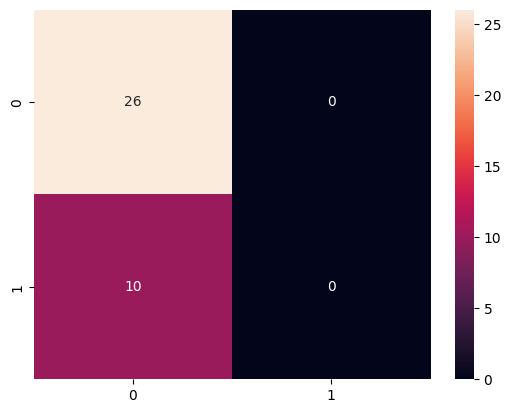

In [21]:
c=confusion_matrix(y_test, y_pred)
sns.heatmap(c, annot=True)